In [47]:
import pandas as pd
from datetime import datetime, date, time
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_data = pd.read_excel("sample.xlsx")

In [3]:
all_data.columns

Index(['Mark', 'Qflow', 'Arrival to secretaries', 'nurse station',
       'scheduled nurse visit time', 'addmitance to nurse time', 'doctor',
       'scheduled doctor visit time', 'addmitance to doctor time',
       'requires blood test'],
      dtype='object')

### QFlow analysis

In [4]:
Qflow_data = all_data[['Qflow', 'Arrival to secretaries']]

In [5]:
Qflow_data.head()

,Qflow,Arrival to secretaries
0,09:30:00,09:37:00
1,09:25:00,09:27:00
2,08:31:00,08:38:00
3,09:10:00,09:17:00
4,08:45:00,08:50:00


In [6]:
#sort by Qflow
Qflow_data = Qflow_data.sort_values(by='Qflow')


In [7]:
Qflow_data

,Qflow,Arrival to secretaries
23,07:23:00,08:02:00
27,07:44:00,08:02:00
26,08:17:00,08:20:00
9,08:27:00,08:37:00
2,08:31:00,08:38:00
4,08:45:00,08:50:00
22,08:50:00,08:54:00
8,08:50:00,08:55:00
3,09:10:00,09:17:00
11,09:13:00,09:17:00


### Seems like secretaries start working at 08:00 so we will only consider arrivals after 08:00 when analyzing secretary service durations

In [8]:
arrival_cutoff = datetime.strptime('08:00:00', '%H:%M:%S').time()
arrival_filter = Qflow_data['Qflow'] > arrival_cutoff

In [9]:
valid_Qflow_data = Qflow_data[arrival_filter]
valid_Qflow_data

,Qflow,Arrival to secretaries
26,08:17:00,08:20:00
9,08:27:00,08:37:00
2,08:31:00,08:38:00
4,08:45:00,08:50:00
22,08:50:00,08:54:00
8,08:50:00,08:55:00
3,09:10:00,09:17:00
11,09:13:00,09:17:00
25,09:23:00,09:25:00
1,09:25:00,09:27:00


In [38]:
# Function to convert time to datetime


def time_to_datetime(obj):
    if isinstance(obj, datetime):
        # If it's already a datetime, return it as is
        return obj
    elif isinstance(obj, time):
        # If it's a time, combine with today's date
        return datetime.combine(date.today(), obj)
    else:
        raise TypeError("Expected a datetime or time object")

# Apply the conversion function to both columns
valid_Qflow_data['Arrival to secretaries'] = valid_Qflow_data['Arrival to secretaries'].apply(time_to_datetime)
valid_Qflow_data['Qflow'] = valid_Qflow_data['Qflow'].apply(time_to_datetime)

# Calculate the duration
valid_Qflow_data['secretary_service_duration'] = valid_Qflow_data['Arrival to secretaries'] - valid_Qflow_data['Qflow']
valid_Qflow_data['secretary_service_duration'] = valid_Qflow_data['secretary_service_duration'].apply(lambda x: int(x.total_seconds() / 60))
valid_Qflow_data

C:\Users\Yoni\AppData\Local\Temp\ipykernel_18376\1517832809.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_Qflow_data['Arrival to secretaries'] = valid_Qflow_data['Arrival to secretaries'].apply(time_to_datetime)
C:\Users\Yoni\AppData\Local\Temp\ipykernel_18376\1517832809.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_Qflow_data['Qflow'] = valid_Qflow_data['Qflow'].apply(time_to_datetime)
C:\Users\Yoni\AppData\Local\Temp\ipykernel_18376\1517832809.py:19: SettingWithCopyWarning: 
A va

,Qflow,Arrival to secretaries,secretary_service_duration
26,2025-06-07 08:17:00,2025-06-07 08:20:00,3
9,2025-06-07 08:27:00,2025-06-07 08:37:00,10
2,2025-06-07 08:31:00,2025-06-07 08:38:00,7
4,2025-06-07 08:45:00,2025-06-07 08:50:00,5
22,2025-06-07 08:50:00,2025-06-07 08:54:00,4
8,2025-06-07 08:50:00,2025-06-07 08:55:00,5
3,2025-06-07 09:10:00,2025-06-07 09:17:00,7
11,2025-06-07 09:13:00,2025-06-07 09:17:00,4
25,2025-06-07 09:23:00,2025-06-07 09:25:00,2
1,2025-06-07 09:25:00,2025-06-07 09:27:00,2


In [41]:
more_data = pd.read_excel('sample_einav.xlsx')

more_data.head()

,Qflow,Arrival to secretaries,secretary_service_duration
0,08:21:00,08:38:00,00:17:00
1,08:26:00,08:39:00,00:13:00
2,08:33:00,08:40:00,00:07:00
3,08:34:00,08:42:00,00:08:00
4,08:41:00,08:48:00,00:07:00


In [44]:
# Apply the conversion function to both columns
more_data['Arrival to secretaries'] = more_data['Arrival to secretaries'].apply(time_to_datetime)
more_data['Qflow'] = more_data['Qflow'].apply(time_to_datetime)

# Calculate the duration
more_data['secretary_service_duration'] = more_data['Arrival to secretaries'] - more_data['Qflow']
more_data['secretary_service_duration'] = more_data['secretary_service_duration'].apply(lambda x: int(x.total_seconds() / 60))
more_data

,Qflow,Arrival to secretaries,secretary_service_duration
0,2025-06-07 08:21:00,2025-06-07 08:38:00,17
1,2025-06-07 08:26:00,2025-06-07 08:39:00,13
2,2025-06-07 08:33:00,2025-06-07 08:40:00,7
3,2025-06-07 08:34:00,2025-06-07 08:42:00,8
4,2025-06-07 08:41:00,2025-06-07 08:48:00,7
5,2025-06-07 08:43:00,2025-06-07 08:53:00,10
6,2025-06-07 08:51:00,2025-06-07 08:56:00,5
7,2025-06-07 08:52:00,2025-06-07 08:59:00,7
8,2025-06-07 08:56:00,2025-06-07 09:00:00,4
9,2025-06-07 08:57:00,2025-06-07 09:04:00,7


In [48]:
sample = np.concatenate([
    valid_Qflow_data['secretary_service_duration'].to_numpy(),
    more_data['secretary_service_duration'].to_numpy()
])


In [50]:
sample

array([ 3, 10,  7,  5,  4,  5,  7,  4,  2,  2,  7,  4,  3,  3,  2,  5, 12,
        1,  8,  3,  0,  5,  2, 17, 13,  7,  8,  7, 10,  5,  7,  4,  7,  5,
        6, 12, 13,  2,  5], dtype=int64)

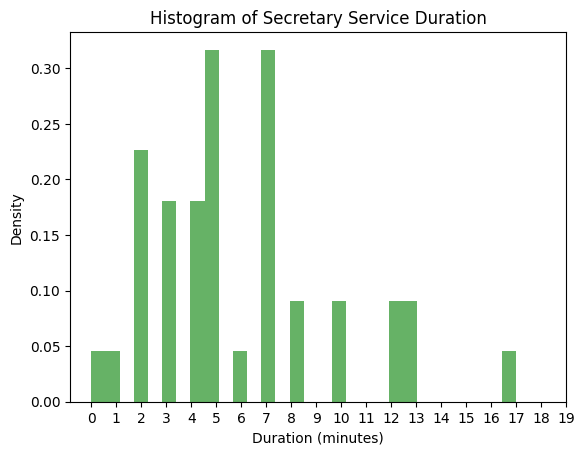

In [55]:
import matplotlib.pyplot as plt

# Plot a histogram of the data
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('Duration (minutes)')
plt.ylabel('Density')
plt.xticks(range(0, 20, 1))
plt.title('Histogram of Secretary Service Duration')
plt.show()

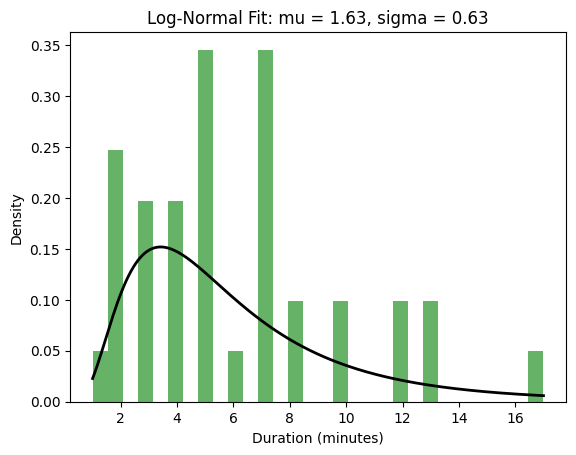

In [57]:
import numpy as np
from scipy.stats import lognorm, norm
import matplotlib.pyplot as plt

# Fit distributions
params_poisson = np.mean(data)
params_neg_binom = stats.nbinom.fit(data, fl0=1)
params_lognorm = stats.lognorm.fit(data, floc=0)
params_gamma = stats.gamma.fit(data, floc=0)

# Plot the fits
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data, kde=False, stat='density', discrete=True, color='green', ax=ax, label='Data')

x = np.arange(min(data), max(data)+1)

# Poisson
poisson_pmf = stats.poisson.pmf(x, params_poisson)
ax.plot(x, poisson_pmf, 'o-', label='Poisson Fit')

# Negative Binomial
neg_binom_pmf = stats.nbinom.pmf(x, *params_neg_binom)
ax.plot(x, neg_binom_pmf, 's-', label='Negative Binomial Fit')

# Lognormal and Gamma (if continuous approximation acceptable)
x_continuous = np.linspace(min(data), max(data), 100)

lognorm_pdf = stats.lognorm.pdf(x_continuous, *params_lognorm)
ax.plot(x_continuous, lognorm_pdf, '-', label='Lognormal Fit')

gamma_pdf = stats.gamma.pdf(x_continuous, *params_gamma)
ax.plot(x_continuous, gamma_pdf, '--', label='Gamma Fit')

ax.legend()
ax.set_title("Distribution Fits to Secretary Service Duration")
ax.set_xlabel("Duration (minutes)")
ax.set_ylabel("Density")
plt.show()
